In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/content/video games sales.csv')

In [24]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [28]:
df2 = df.dropna()

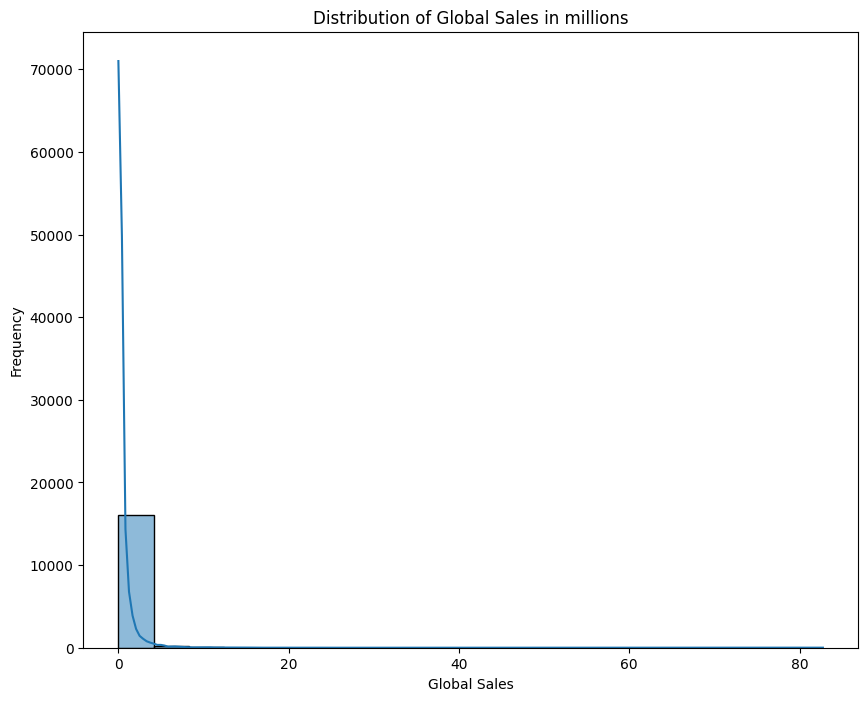

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(df2['Global_Sales'], bins = 20, kde = True)
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales in millions')
plt.show()

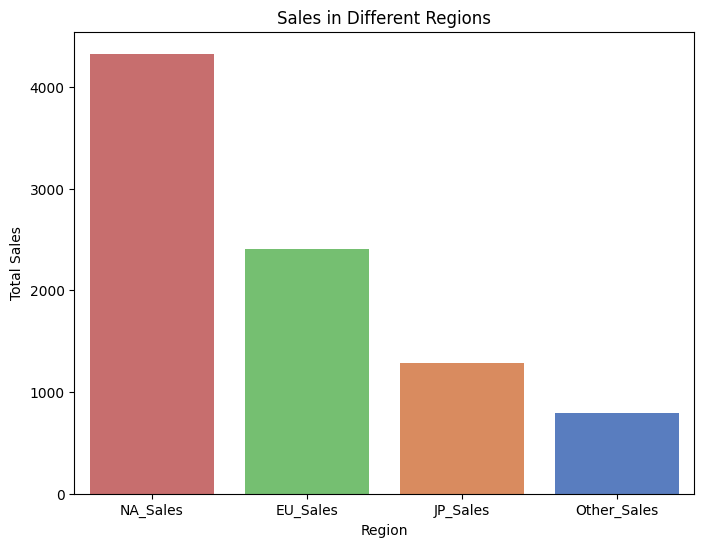

In [ ]:
Region = df2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize = (8, 6))
sns.barplot(x = Region.index, y = Region.values,hue = Region, palette = 'muted', legend = False)
plt.title('Sales in Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

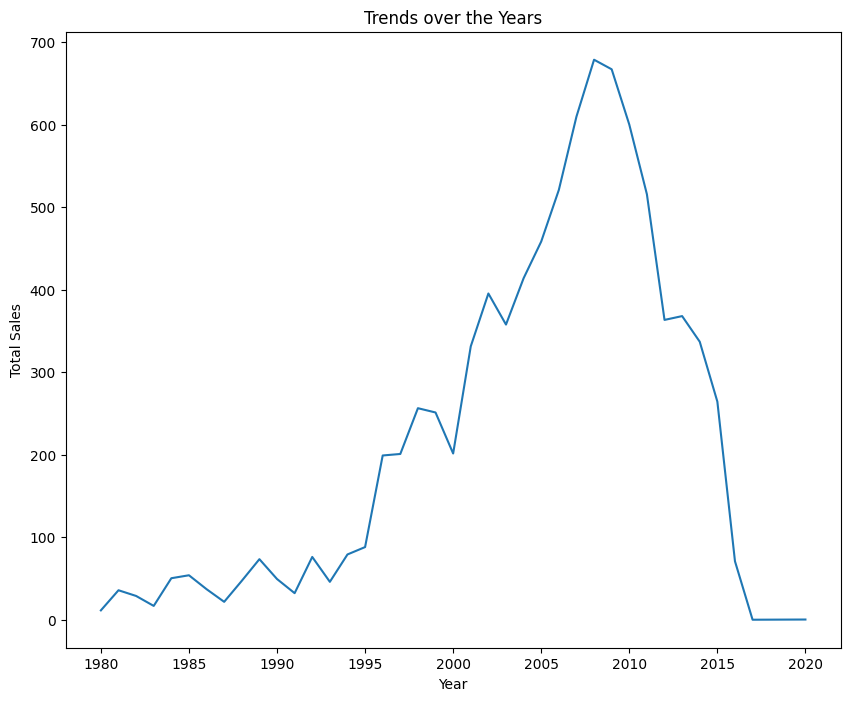

In [ ]:
Year_sales = df2.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize = (10, 8))
sns.lineplot(x = Year_sales.index, y = Year_sales.values)
plt.title('Trends over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

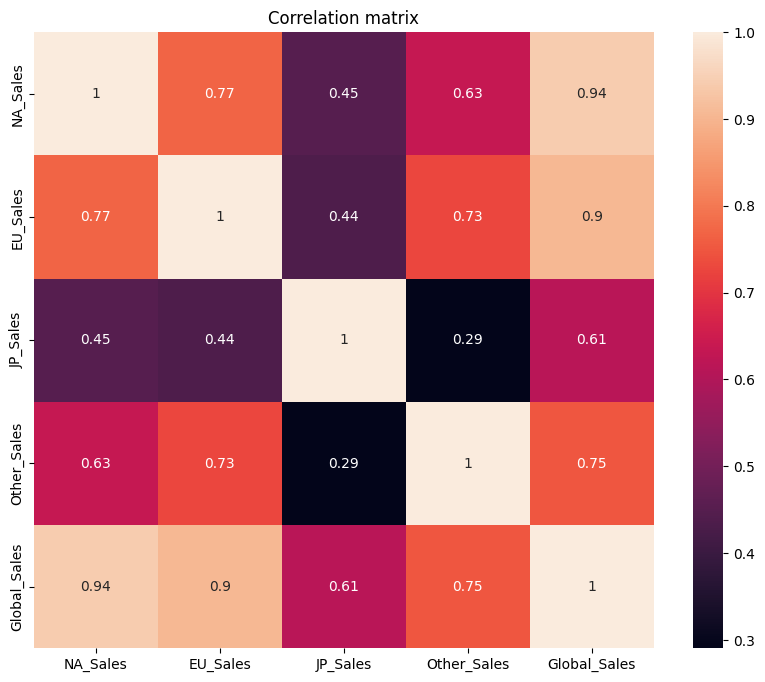

In [ ]:
Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
corr_matrix = df2[Sales].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation matrix')
plt.show()

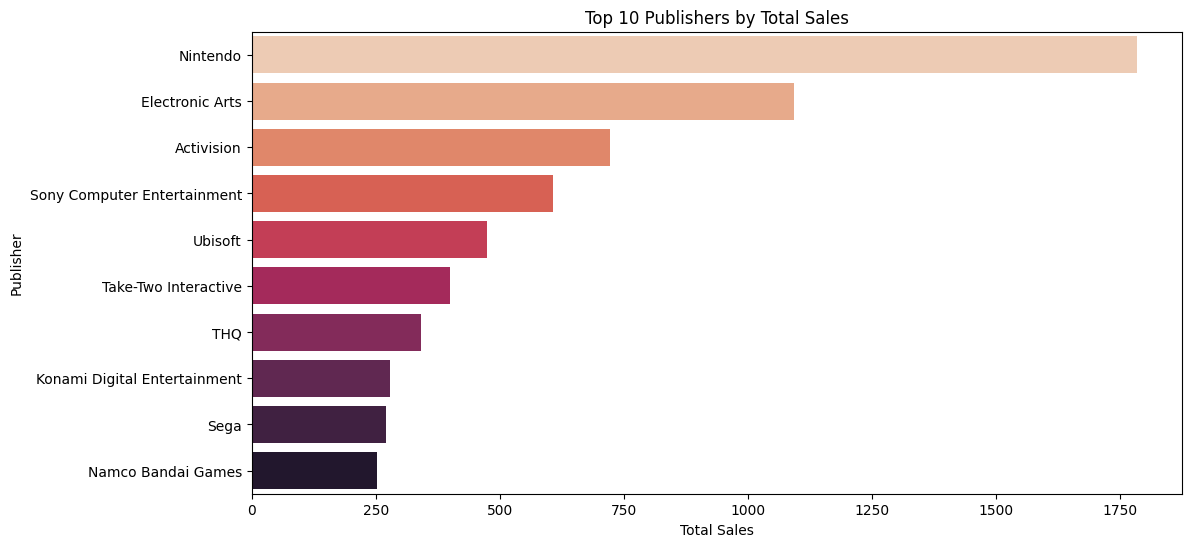

In [ ]:
publisher = df2.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
publisher['Total_Sales'] = publisher.sum(axis = 1)
top_publish = publisher.sort_values('Total_Sales', ascending = False).head(10)

plt.figure(figsize = (12, 6))
sns.barplot(x = top_publish['Total_Sales'], y = top_publish.index, hue = top_publish.index, palette = 'rocket_r')
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Total Sales')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
platform_encoder = LabelEncoder()
genre_encoder = LabelEncoder()
publisher_encoder = LabelEncoder()

df2.loc[:,'Platform'] = platform_encoder.fit_transform(df2['Platform'])
df2.loc[:,'Genre'] = genre_encoder.fit_transform(df2['Genre'])
df2.loc[:,'Publisher'] = publisher_encoder.fit_transform(df2['Publisher'])

In [32]:
X = df2.drop(['Global_Sales', 'Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
y = df2['Global_Sales']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
y_pred = dt.predict(X_test)

print("Decision Tree (Pre-Launch)")
print("R2 Score:", round(r2_score(y_test, y_pred), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))

Decision Tree (Pre-Launch)
R2 Score: 0.8411
MAE: 0.0179
RMSE: 0.8244
